# Trabajo Integrador Parte 4

Nombre: Clara Bureu

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [292]:
DATASET_PATH = "./data/heart_disease/"

In [293]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [294]:
my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [295]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [296]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

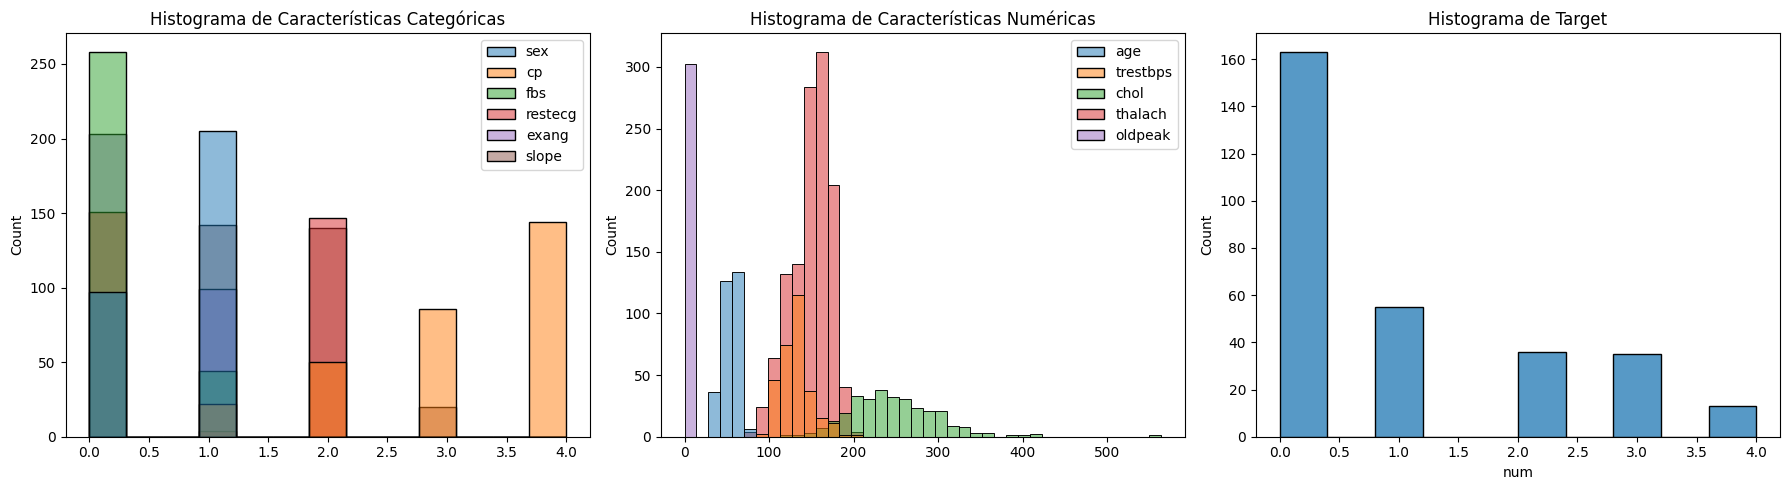

In [297]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=my_data[categorical_features], ax=axes[0])
axes[0].set_title("Histograma de Características Categóricas")

sns.histplot(data=my_data[numerical_features], ax=axes[1])
axes[1].set_title("Histograma de Características Numéricas")

sns.histplot(data=my_data[target], ax=axes[2])
axes[2].set_title("Histograma de Target")

plt.tight_layout()
plt.show()

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [298]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [299]:
y = my_data[target].values

In [300]:
sano_mask = y == 0
enfermo_mask = y > 0

In [301]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

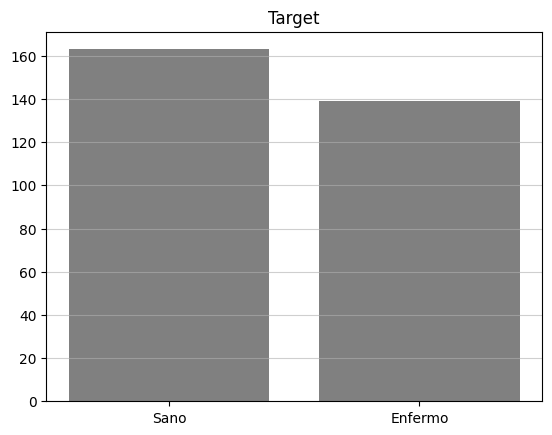

In [302]:
y_class

plt.hist(y_class, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='gray')
plt.grid(axis='y', alpha=0.6)

plt.title('Target')
plt.xticks([0, 1], ['Sano', 'Enfermo'])
plt.show()

In [303]:
y_class_df = pd.DataFrame(y_class, columns=["target"])
my_data = pd.concat([my_data, y_class_df], axis=1)
my_data.drop(columns=["num"], inplace=True)
my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


One hot encoding

In [304]:
unique_values = my_data[categorical_features].apply(lambda x: x.unique())
print(unique_values)
my_data_encoded = pd.get_dummies(my_data, columns=categorical_features, drop_first=True)
my_data_encoded.drop(numerical_features, axis=1).head()

sex                     [1.0, 0.0]
cp            [4.0, 3.0, 2.0, 1.0]
fbs                     [0.0, 1.0]
restecg            [2.0, 0.0, 1.0]
exang                   [1.0, 0.0]
slope              [2.0, 3.0, 1.0]
ca         [3.0, 2.0, 0.0, 1.0, ?]
thal            [3.0, 7.0, 6.0, ?]
dtype: object


,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,1,True,False,False,True,False,False,True,True,True,False,False,False,True,False,False,False,False
1,1,True,False,False,True,False,False,True,True,True,False,False,True,False,False,False,True,False
2,0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [305]:
#encoder = OneHotEncoder()
#encoded_features = encoder.fit_transform(my_data[categorical_features])
#encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
#encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)
#encoded_df.head()

my_data_encoded = pd.get_dummies(my_data[categorical_features])
my_data_encoded.head()

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False


In [306]:
rows_with_unknown_values = my_data[categorical_features].apply(lambda x: '?' in x.values, axis=1)
my_data_cleaned = my_data.loc[~rows_with_unknown_values]
num_rows_dropped = len(my_data) - len(my_data_cleaned)
print("Número de filas eliminadas:", len(my_data) - len(my_data_cleaned), " (",round(num_rows_dropped/len(my_data)*100,2),"%)")
my_data = my_data_cleaned

Número de filas eliminadas: 6  ( 1.99 %)


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [307]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [308]:
X = my_data.drop(['target'], axis=1)
y = my_data['target']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=my_data['target'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.1, shuffle=True, stratify=y_train)

print("Train:", len(X_train))
print("Tests:", len(X_test))
print("Validation:", len(X_val))

Train: 212
Tests: 60
Validation: 24


In [309]:
def evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=False, Scale=False, Model='logistic'):
    if Scale:
        scaler = StandardScaler()
        X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
        X_val[numerical_features] = scaler.transform(X_val[numerical_features])
        X_test[numerical_features] = scaler.transform(X_test[numerical_features])
    
    if PCA_Model:
        pca = PCA(n_components=0.9).fit(X_train[numerical_features])
        X_train = pca.transform(X_train[numerical_features])
        X_val = pca.transform(X_val[numerical_features])
        X_test = pca.transform(X_test[numerical_features])

    if Model == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif Model == 'logistic_cv':
        model = LogisticRegressionCV(max_iter=1000)
    else:
        raise ValueError("Model type should be 'logistic' or 'logistic_cv'")

    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    sns.histplot(data=y_pred_val)

    accuracy_val = accuracy_score(y_pred_val, y_val)
    precision_val = precision_score(y_pred_val, y_val)
    recall_val = recall_score(y_pred_val, y_val)
    f1_val = f1_score(y_pred_val, y_val)

    metrics_val_df = pd.DataFrame({
        'Modelo': [Model],
        'PCA': [PCA_Model],
        'Scale': [Scale],
        'Accuracy': [accuracy_val],
        'Precision': [precision_val],
        'Recall': [recall_val],
        'F1': [f1_val]
    })

    accuracy_test = accuracy_score(y_pred_test, y_test)
    classification_report_test = classification_report(y_test, y_pred_test)
    
    #print("Model:", Model)
    #print("Accuracy on test set:", accuracy_test)
    #print("Classification report on test set:\n", classification_report_test)

    return metrics_val_df


        Modelo    PCA  Scale  Accuracy  Precision    Recall        F1
0     logistic   True  False  0.666667   0.454545  0.714286  0.555556
1     logistic  False  False  0.833333   0.727273  0.888889  0.800000
2     logistic   True   True  0.666667   0.454545  0.714286  0.555556
3     logistic  False   True  0.833333   0.727273  0.888889  0.800000
4  logistic_cv   True  False  0.666667   0.363636  0.800000  0.500000
5  logistic_cv  False  False  0.791667   0.636364  0.875000  0.736842
6  logistic_cv   True   True  0.666667   0.363636  0.800000  0.500000
7  logistic_cv  False   True  0.791667   0.636364  0.875000  0.736842


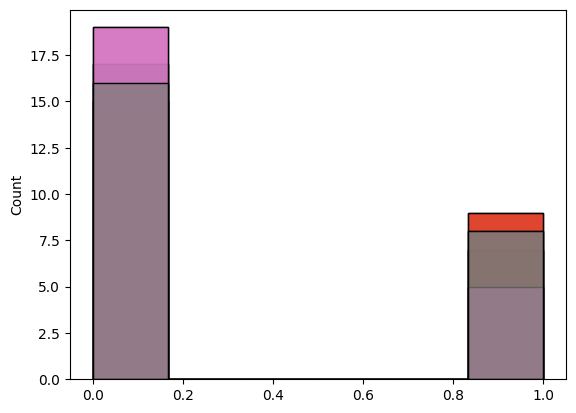

In [311]:
df_result = pd.DataFrame()

df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=False, Model='logistic')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=False, Scale=False, Model='logistic')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='logistic')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=False, Scale=True, Model='logistic')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=False, Model='logistic_cv')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=False, Scale=False, Model='logistic_cv')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='logistic_cv')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=False, Scale=True, Model='logistic_cv')], ignore_index=True)
print(df_result)

Conclusiones:

En este análisis, se exploraron diferentes configuraciones de modelos de regresión logística para predecir el objetivo deseado. Se evaluaron tres aspectos clave: el uso de PCA (Análisis de Componentes Principales), el escalado de características y el uso de la técnica de Regresión Logística con Cross Validation (LogisticRegressionCV).

Impacto del PCA y el Escalado:
Se observó que las métricas de rendimiento en términos de precisión, recuperación y F1-score variaron según la aplicación o no de PCA y escalado. Las configuraciones sin PCA ni escalado obtuvieron las métricas más altas. Esto sugiere que la inclusión de todas las características originales, sin reducción de dimensionalidad ni normalización, resultó en un mejor rendimiento predictivo para este conjunto de datos específico.

Importancia del Escalado:
La normalización de características (escalado) puede ser crucial para los algoritmos basados en distancias y gradientes, como la Regresión Logística. Aunque en este caso no se obtuvieron los mejores resultados con datos escalados, en otros contextos puede ser esencial para mejorar el rendimiento del modelo.

Regresión Logística vs. Regresión Logística con Cross Validation:
Se observó que tanto la Regresión Logística estándar como la Regresión Logística con Cross Validation ofrecieron resultados similares en términos de métricas de rendimiento. Esto sugiere que, en este caso, no hubo una mejora significativa al usar la variante con Cross Validation. Sin embargo, es importante mencionar que la Regresión Logística con Cross Validation puede ser más robusta y generalizable en situaciones donde los datos están sujetos a variaciones o ruido.